In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Дерево решеинй. Классификатор.

In [352]:
class Kernel:
  def c(self,y):
    return y.mode()[0]

  def h(self, y):
    p = y.value_counts(normalize=True)
    return 1 - (p ** 2).sum()

  def Branch(self,df):

    max_branch = 0
    out = None

    for i in df.columns[:-1]:

      yx_sorted = df.sort_values(i)[[i, df.columns[-1]]]
      x = yx_sorted[i]
      for t in x.index[1:]:
        crit = x.loc[t]
        y_l = yx_sorted[yx_sorted[i] <  crit][df.columns[-1]]
        y_r = yx_sorted[yx_sorted[i] >= crit][df.columns[-1]]

        if y_l.shape[0] == 0 or y_r.shape[0] == 0:
          continue 

        H_cur = self.h(yx_sorted[df.columns[-1]])
        H_l   = self.h(y_l)
        H_r   = self.h(y_r)

        m = yx_sorted[df.columns[-1]].shape[0]
        l = y_l     .shape[0]
        r = y_r     .shape[0]

        current_branch = H_cur - l/m * H_l - r/m * H_r
        if max_branch < current_branch:
          crit = x[t]
          out = {'j': i, 't': crit, 'x_l_index': x[x < crit].index, 'x_r_index':x[x >= crit].index}
          max_branch = current_branch
    
    return out

In [353]:
class Node:
    def __init__(self):
        self.t = None
        self.j = None
        self.next_left = None
        self.next_right = None
        self.c = None
    
    def move(self, obj):
        if obj[self.j] <= self.t:
            return True
        else:
            return False

In [354]:
class Tree(Kernel):
    depth = 0
    def construct_tree(self, df):
        if df.shape[0] == 1 or df.shape[0] < self.max_per_leaf:
            node = Node()
            node.c = self.c(df[df.columns[-1]])
            return node
        if len(pd.unique(df[df.columns[-1]])) == 1:
            node = Node()
            node.c = self.c(df[df.columns[-1]])
            return node
        if self.depth == self.max_depth:
            node = Node()
            node.c = self.c(df[df.columns[-1]])
            return node
        else:
            self.depth += 1
            
        info_about_split = self.Branch(df)
        node = Node()
        node.t = info_about_split['t']
        node.j = info_about_split['j']
        node.next_left = self.construct_tree(df.loc[info_about_split['x_l_index']])
        node.next_right = self.construct_tree(df.loc[info_about_split['x_r_index']])
        return node
    
    def fit(self, X, y, max_depth=10, max_per_leaf=5):
        self.max_depth = max_depth
        self.max_per_leaf = max_per_leaf
        self.X = X # Для отображения
        self.y = y # Для отображения
        self.root = self.construct_tree(pd.concat([X, y], axis=1))
        return self
    
    def predict(self, X):
        ans = []
        for i in range(0, X.shape[0]):
            node = self.root
            x = X.iloc[i]
            while node.c is None:
                if node.move(x) is True:
                    node = node.next_left
                else:
                    node = node.next_right
            ans.append(node.c)
        return pd.DataFrame(ans)
    
    def score(self, X, y):
        return (self.predict(X).values == y.values).sum()/X.shape[0]
    
    def plot(self, X):
        plt.scatter(self.X[X.columns[0]], self.X[X.columns[1]], c=self.y.values, marker='o')
        plt.scatter(X[X.columns[0]], X[X.columns[1]], c=self.predict(X).values, marker='x')

In [355]:
from sklearn.datasets import make_classification

N = 2

X, y = make_classification(random_state=10,
                           n_features=N,
                           n_informative=N,
                           n_redundant=0,
                           n_samples=100,
                           n_classes=3,
                           n_clusters_per_class=1)
X = pd.DataFrame(X, columns=[f'X{i}' for i in range(N)])
y = pd.DataFrame(y, columns=['Y'])

In [356]:
model = Tree().fit(X.head(50), y.head(50), 100, 3)
model.score(X.tail(50), y.tail(50))

0.9

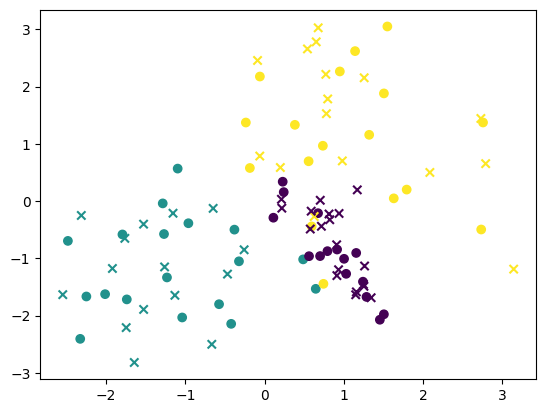

In [357]:
model.plot(X.tail(50))

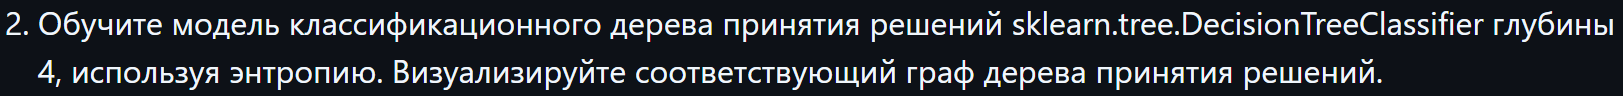

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data[:, -2:], columns=['X0', 'X1'])
y = pd.DataFrame(data.target, columns=['Y'])

In [ ]:
model = Tree().fit(X, y, 4)
model.score(X, y)

0.9666666666666667

# Дерево решений. Регррессор.

In [ ]:
class Kernel:
  def c(self, y):
    return y.mean()

  def h(self, y):
    return ((y - self.c(y))**2/y.shape[0]).sum()

  def Branch(self,df):

    max_branch = 0
    out = None

    for i in df.columns[:-1]:

      yx_sorted = df.sort_values(i)[[i, df.columns[-1]]]
      x = yx_sorted[i]
      for t in x.index[1:]:
        crit = x.loc[t]
        y_l = yx_sorted[yx_sorted[i] <  crit][df.columns[-1]]
        y_r = yx_sorted[yx_sorted[i] >= crit][df.columns[-1]]

        if y_l.shape[0] == 0 or y_r.shape[0] == 0:
          continue 

        H_cur = self.h(yx_sorted[df.columns[-1]])
        H_l   = self.h(y_l)
        H_r   = self.h(y_r)

        m = yx_sorted[df.columns[-1]].shape[0]
        l = y_l     .shape[0]
        r = y_r     .shape[0]

        current_branch = H_cur - l/m * H_l - r/m * H_r
        if max_branch < current_branch:
          crit = x[t]
          out = {'j': i, 't': crit, 'x_l_index': x[x < crit].index, 'x_r_index':x[x >= crit].index}
          max_branch = current_branch
    
    return out

In [ ]:
class Node:
    def __init__(self):
        self.t = None
        self.j = None
        self.next_left = None
        self.next_right = None
        self.c = None
    
    def move(self, obj):
        if obj[self.j] <= self.t:
            return True
        else:
            return False

In [ ]:
class Tree(Kernel):
    depth = 0
    def construct_tree(self, df):
        if df.shape[0] == 1 or df.shape[0] < self.max_per_leaf:
            node = Node()
            node.c = self.c(df[df.columns[-1]])
            return node
        if len(pd.unique(df[df.columns[-1]])) == 1:
            node = Node()
            node.c = self.c(df[df.columns[-1]])
            return node
        if self.depth == self.max_depth:
            node = Node()
            node.c = self.c(df[df.columns[-1]])
            return node
        else:
            self.depth += 1
            
        info_about_split = self.Branch(df)
        node = Node()
        node.t = info_about_split['t']
        node.j = info_about_split['j']
        node.next_left = self.construct_tree(df.loc[info_about_split['x_l_index']])
        node.next_right = self.construct_tree(df.loc[info_about_split['x_r_index']])
        return node
    
    def fit(self, X, y, max_depth=10, max_per_leaf=5):
        self.max_depth = max_depth
        self.max_per_leaf = max_per_leaf
        self.root = self.construct_tree(pd.concat([X, y], axis=1))
        return self
    
    def predict(self, X):
        ans = []
        for i in range(0, X.shape[0]):
            node = self.root
            x = X.iloc[i]
            while node.c is None:
                if node.move(x) is True:
                    node = node.next_left
                else:
                    node = node.next_right
            ans.append(node.c)
        return pd.DataFrame(ans)
    
    def score(self, X, y):
        return 1 - ((y.values - self.predict(X).values)**2).sum()/((y.values - np.mean(y))**2).sum()
    
    def plot(self, X, y):
        yy = self.predict(X)
        plt.scatter(yy,y)
        plt.plot(yy, yy, c='r')
        plt.show()

In [ ]:
from sklearn.datasets import make_regression

N = 1
N_s = 500

X, y = make_regression(n_samples=N_s, n_features=N, noise=10, random_state=12)
X = pd.DataFrame(X, columns=[f'X{i}' for i in range(N)])
y = pd.DataFrame(y, columns=['Y'])

In [ ]:
model = Tree().fit(X, y, 200, 5)
model.score(X, y)

0.8138592444181183

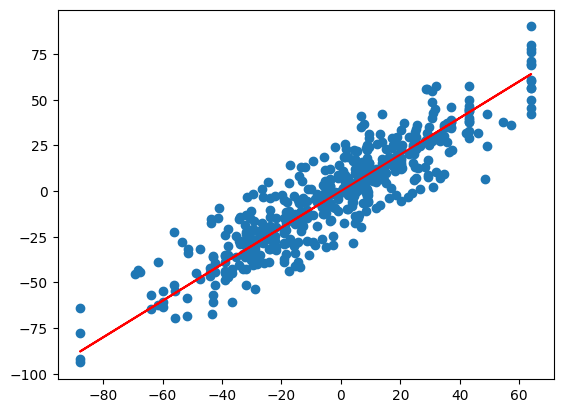

In [ ]:
model.plot(X, y)

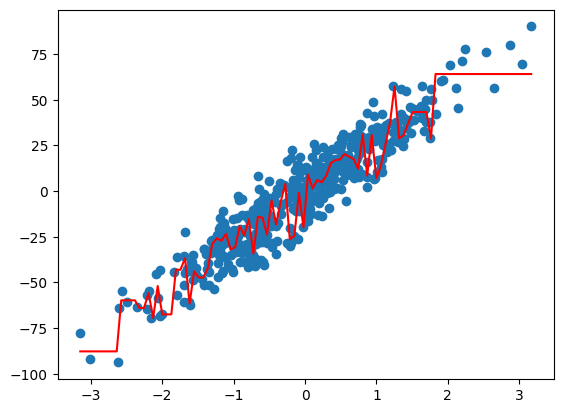

In [ ]:
import matplotlib.pyplot as plt

X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(pd.DataFrame(X_fit, columns=['X0']))
plt.plot(X_fit, y_fit, color='red')
plt.scatter(X, y)

# Дерево решений. Попытка 2.